In [515]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn 

## DATA LOADING

In [9]:
State_Txn_Users =  pd.read_excel("phonepe-pulse_raw-data.xlsx", sheet_name = 'State_Txn and Users')
State_Txn_Users.head(5)

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


In [11]:
State_Txn_Split = pd.read_excel("phonepe-pulse_raw-data.xlsx", sheet_name = "State_TxnSplit")
State_Txn_Split.tail(10)

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
2504,West Bengal,2021,1,Peer-to-peer payments,53869075,2.022402e+11,3754.292226
2505,West Bengal,2021,1,Merchant payments,37143701,2.891834e+10,778.553104
2506,West Bengal,2021,1,Recharge & bill payments,26673733,1.133967e+10,425.124820
2507,West Bengal,2021,1,Financial Services,166727,1.754458e+08,1052.293941
2508,West Bengal,2021,1,Others,400816,2.635025e+08,657.415236
2509,West Bengal,2021,2,Peer-to-peer payments,64661051,2.308123e+11,3569.572026
2510,West Bengal,2021,2,Merchant payments,41696787,3.478787e+10,834.305703
2511,West Bengal,2021,2,Recharge & bill payments,34799709,1.333145e+10,383.090958
2512,West Bengal,2021,2,Financial Services,190537,1.864665e+08,978.636630
2513,West Bengal,2021,2,Others,549353,3.167447e+08,576.577748


In [13]:
State_Device_Data = pd.read_excel("phonepe-pulse_raw-data.xlsx", sheet_name = "State_DeviceData")
start_index = len(State_Device_Data) // 2 - 5  # Calculate the starting index for the middle 10 rows
middle_ten_rows = State_Device_Data.iloc[start_index:start_index + 10]
print(middle_ten_rows)

            State  Year  Quarter     Brand  Registered Users  Percentage
2767       Ladakh  2021        2   OnePlus              1741    0.023198
2768       Ladakh  2021        2  Motorola               922    0.012285
2769       Ladakh  2021        2    Huawei               894    0.011912
2770       Ladakh  2021        2    Lenovo               490    0.006529
2771       Ladakh  2021        2    Others              2610    0.034778
2772  Lakshadweep  2018        1   Samsung               102    0.203593
2773  Lakshadweep  2018        1    Xiaomi               100    0.199601
2774  Lakshadweep  2018        1      Vivo                67    0.133733
2775  Lakshadweep  2018        1      Oppo                56    0.111776
2776  Lakshadweep  2018        1    Huawei                25    0.049900


In [23]:
District_Txn_Users = pd.read_excel("phonepe-pulse_raw-data.xlsx", sheet_name = "District_Txn and Users")
First_10_Rows = District_Txn_Users.head(10)
Last_10_Rows = District_Txn_Users.tail(10)
Combined_Rows = pd.concat([First_10_Rows, Last_10_Rows], axis=0)
print(Combined_Rows)

                           State  Year  Quarter                    District  \
0      Andaman & Nicobar Islands  2018        1                    Nicobars   
1      Andaman & Nicobar Islands  2018        1    North And Middle Andaman   
2      Andaman & Nicobar Islands  2018        1               South Andaman   
3      Andaman & Nicobar Islands  2018        2                    Nicobars   
4      Andaman & Nicobar Islands  2018        2    North And Middle Andaman   
5      Andaman & Nicobar Islands  2018        2               South Andaman   
6      Andaman & Nicobar Islands  2018        3                    Nicobars   
7      Andaman & Nicobar Islands  2018        3    North And Middle Andaman   
8      Andaman & Nicobar Islands  2018        3               South Andaman   
9      Andaman & Nicobar Islands  2018        4                    Nicobars   
10238                West Bengal  2021        2                 Murshidabad   
10239                West Bengal  2021        2     

In [15]:
District_Demographics = pd.read_excel("District Demographics.xlsx")
every_10th_row = District_Demographics.iloc[::10]
print(every_10th_row)

                 State       District   Headquarters  Population  \
0       Andhra Pradesh      Anantapur      Anantapur     4083315   
10      Andhra Pradesh  Visakhapatnam  Visakhapatnam     4288113   
20   Arunachal Pradesh      Lepa Rada          Basar           0   
30   Arunachal Pradesh          Siang         Pangin       31920   
40               Assam        Barpeta        Barpeta     1693622   
..                 ...            ...            ...         ...   
700         Chandigarh     Chandigarh     Chandigarh     1055450   
710    Jammu & Kashmir          Jammu          Jammu     1526406   
720    Jammu & Kashmir          Samba          Samba      318611   
730              Delhi    North Delhi   Sadar Bazaar      887978   
740         Puducherry     Puducherry    Pondicherry      950289   

     Area (sq km)  Density  Code Alternate Name  
0         19130.0      213  AP01      Anantapur  
10        11161.0      384  AP10  Visakhapatnam  
20            0.0        0  AR08 

## Dispaly the basic Statistics and data types for each dataset

In [17]:
# Select only numeric columns
numeric_df = State_Txn_Users.select_dtypes(include=['number'])
# Calculate Mean for all numeric columns
mean_values = numeric_df.mean()
# Calculate Median for all numeric columns
median_values = numeric_df.median()
# Calculate Mode for all numeric columns
mode_values = numeric_df.mode().iloc[0]  # Get the first mode in case of multiple modes
# Print the results
print("Mean for each numeric column:")
print(mean_values)
print("\nMedian for each numeric column:")
print(median_values)
print("\nMode for each numeric column:")
print(mode_values)

Mean for each numeric column:
Year                2.019286e+03
Quarter             2.357143e+00
Transactions        4.074000e+07
Amount (INR)        7.083332e+10
ATV (INR)           1.993472e+03
Registered Users    4.777501e+06
App Opens           9.774471e+07
dtype: float64

Median for each numeric column:
Year                2.019000e+03
Quarter             2.000000e+00
Transactions        6.217487e+06
Amount (INR)        1.051605e+10
ATV (INR)           1.861381e+03
Registered Users    1.747914e+06
App Opens           2.930574e+06
dtype: float64

Mode for each numeric column:
Year                2.018000e+03
Quarter             1.000000e+00
Transactions        7.780000e+02
Amount (INR)        1.928611e+06
ATV (INR)           0.000000e+00
Registered Users    5.010000e+02
App Opens           0.000000e+00
Name: 0, dtype: float64


In [19]:
# Select only numeric columns
numeric_df = State_Txn_Split.select_dtypes(include=['number'])
# Calculate Mean for all numeric columns
mean_values = numeric_df.mean()
# Calculate Median for all numeric columns
median_values = numeric_df.median()
# Calculate Mode for all numeric columns
mode_values = numeric_df.mode().iloc[0]  # Get the first mode in case of multiple modes
# Print the results
print("Mean for each numeric column:")
print(mean_values)
print("\nMedian for each numeric column:")
print(median_values)
print("\nMode for each numeric column:")
print(mode_values)

Mean for each numeric column:
Year            2.019287e+03
Quarter         2.358393e+00
Transactions    8.167446e+06
Amount (INR)    1.443978e+10
ATV (INR)       1.349928e+03
dtype: float64

Median for each numeric column:
Year            2.019000e+03
Quarter         2.000000e+00
Transactions    2.687980e+05
Amount (INR)    1.901189e+08
ATV (INR)       7.209404e+02
dtype: float64

Mode for each numeric column:
Year            2020.000000
Quarter            2.000000
Transactions       6.000000
Amount (INR)      34.397212
ATV (INR)         17.198606
Name: 0, dtype: float64


In [111]:
# Select only numeric columns
numeric_df = State_Device_Data.select_dtypes(include=['number'])
# Calculate Mean for all numeric columns
mean_values = numeric_df.mean()
# Calculate Median for all numeric columns
median_values = numeric_df.median()
# Calculate Mode for all numeric columns
mode_values = numeric_df.mode().iloc[0]  # Get the first mode in case of multiple modes
# Print the results
print("Mean for each numeric column:")
print(mean_values)
print("\nMedian for each numeric column:")
print(median_values)
print("\nMode for each numeric column:")
print(mode_values)

Mean for each numeric column:
Year                  2019.285714
Quarter                  2.357143
Registered Users    434318.262446
Percentage               0.090909
dtype: float64

Median for each numeric column:
Year                 2019.000000
Quarter                 2.000000
Registered Users    74422.500000
Percentage              0.056914
dtype: float64

Mode for each numeric column:
Year                2018.000000
Quarter                1.000000
Registered Users      24.000000
Percentage             0.012574
Name: 0, dtype: float64


In [25]:
# Select only numeric columns
numeric_df = District_Txn_Users.select_dtypes(include=['number'])
# Calculate Mean for all numeric columns
mean_values = numeric_df.mean()
# Calculate Median for all numeric columns
median_values = numeric_df.median()
# Calculate Mode for all numeric columns
mode_values = numeric_df.mode().iloc[0]  # Get the first mode in case of multiple modes
# Print the results
print("Mean for each numeric column:")
print(mean_values)
print("\nMedian for each numeric column:")
print(median_values)
print("\nMode for each numeric column:")
print(mode_values)

Mean for each numeric column:
Year                2.019286e+03
Quarter             2.357143e+00
Transactions        2.003607e+06
Amount (INR)        3.542311e+09
ATV (INR)           1.909797e+03
Registered Users    2.349591e+05
App Opens           4.807117e+06
dtype: float64

Median for each numeric column:
Year                2.019000e+03
Quarter             2.000000e+00
Transactions        3.763065e+05
Amount (INR)        6.784562e+08
ATV (INR)           1.863136e+03
Registered Users    1.067640e+05
App Opens           6.403025e+05
dtype: float64

Mode for each numeric column:
Year                2018.000000
Quarter                1.000000
Transactions           0.000000
Amount (INR)           0.000000
ATV (INR)             84.944283
Registered Users     144.000000
App Opens              0.000000
Name: 0, dtype: float64


In [27]:
# Select only numeric columns
numeric_df = District_Demographics.select_dtypes(include=['number'])
# Calculate Mean for all numeric columns
mean_values = numeric_df.mean()
# Calculate Median for all numeric columns
median_values = numeric_df.median()
# Calculate Mode for all numeric columns
mode_values = numeric_df.mode().iloc[0]  # Get the first mode in case of multiple modes
# Print the results
print("Mean for each numeric column:")
print(mean_values)
print("\nMedian for each numeric column:")
print(median_values)
print("\nMode for each numeric column:")
print(mode_values)

Mean for each numeric column:
Population      1.668555e+06
Area (sq km)    4.395373e+03
Density         8.385121e+02
dtype: float64

Median for each numeric column:
Population      1322359.0
Area (sq km)       3402.5
Density             353.0
dtype: float64

Mode for each numeric column:
Population      0.0
Area (sq km)    0.0
Density         0.0
Name: 0, dtype: float64


In [29]:
State_Txn_Users.dtypes

State                object
Year                  int64
Quarter               int64
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Users      int64
App Opens             int64
dtype: object

In [31]:
State_Txn_Split.dtypes

State                object
Year                  int64
Quarter               int64
Transaction Type     object
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
dtype: object

In [33]:
State_Device_Data.dtypes

State                object
Year                  int64
Quarter               int64
Brand                object
Registered Users      int64
Percentage          float64
dtype: object

In [35]:
District_Txn_Users.dtypes

State                object
Year                  int64
Quarter               int64
District             object
Code                 object
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Users      int64
App Opens             int64
dtype: object

In [37]:
District_Demographics.dtypes

State              object
District           object
Headquarters       object
Population          int64
Area (sq km)      float64
Density             int64
Code               object
Alternate Name     object
dtype: object

## Check for Missing Values

In [39]:
# Calculate the number missing values 
missing_values = State_Txn_Users.isnull().sum()
print(missing_values)

# Calculate the percentage of missing values for each column
missing_percentage = (State_Txn_Users.isnull().sum() / len(State_Txn_Users)) * 100
# Filter to show only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]
# Display the result
print(missing_percentage)

# Identify the column with the highest number of missing values
max_missing_column = missing_values.idxmax()
max_missing_count = missing_values.max()
# Display the result
print(f"Column with the highest number of missing values: '{max_missing_column}' with {max_missing_count} missing values.")

State               0
Year                0
Quarter             0
Transactions        0
Amount (INR)        1
ATV (INR)           0
Registered Users    0
App Opens           0
dtype: int64
Amount (INR)    0.198413
dtype: float64
Column with the highest number of missing values: 'Amount (INR)' with 1 missing values.


In [41]:
# Calculate the number missing values 
missing_values = State_Txn_Split.isnull().sum()
print(missing_values)

# Calculate the percentage of missing values for each column
missing_percentage = (State_Txn_Split.isnull().sum() / len(State_Txn_Split)) * 100
# Filter to show only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]
# Display the result
print(missing_percentage)

# Identify the column with the highest number of missing values
max_missing_column = missing_values.idxmax()
max_missing_count = missing_values.max()
# Display the result
print(f"Column with the highest number of missing values: '{max_missing_column}' with {max_missing_count} missing values.")

State               0
Year                0
Quarter             0
Transaction Type    0
Transactions        0
Amount (INR)        0
ATV (INR)           0
dtype: int64
Series([], dtype: float64)
Column with the highest number of missing values: 'State' with 0 missing values.


In [43]:
# Calculate the number missing values 
missing_values = State_Device_Data.isnull().sum()
print(missing_values)

# Calculate the percentage of missing values for each column
missing_percentage = (State_Device_Data.isnull().sum() / len(State_Device_Data)) * 100
# Filter to show only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]
# Display the result
print(missing_percentage)

# Identify the column with the highest number of missing values
max_missing_column = missing_values.idxmax()
max_missing_count = missing_values.max()
# Display the result
print(f"Column with the highest number of missing values: '{max_missing_column}' with {max_missing_count} missing values.")

State               0
Year                0
Quarter             0
Brand               0
Registered Users    0
Percentage          0
dtype: int64
Series([], dtype: float64)
Column with the highest number of missing values: 'State' with 0 missing values.


In [167]:
# Calculate the number missing values 
missing_values = District_Txn_Users.isnull().sum()
print(missing_values)

# Calculate the percentage of missing values for each column
missing_percentage = (District_Txn_Users.isnull().sum() / len(District_Txn_Users * 100))
# Filter to show only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]
# Display the result
print(missing_percentage)

# Identify the column with the highest number of missing values
max_missing_column = missing_values.idxmax()
max_missing_count = missing_values.max()
# Display the result
print(f"Column with the highest number of missing values: '{max_missing_column}' with {max_missing_count} missing values.")

State                0
Year                 0
Quarter              0
District             0
Code                28
Transactions         0
Amount (INR)         0
ATV (INR)            4
Registered Users     0
App Opens            0
dtype: int64
Code         0.002732
ATV (INR)    0.000390
dtype: float64
Column with the highest number of missing values: 'Code' with 28 missing values.


In [47]:
# Calculate the number missing values 
missing_values = District_Demographics.isnull().sum()
print(missing_values)

# Calculate the percentage of missing values for each column
missing_percentage = (District_Demographics.isnull().sum() / len(District_Demographics * 100))
# Filter to show only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]
# Display the result
print(missing_percentage)

# Identify the column with the highest number of missing values
max_missing_column = missing_values.idxmax()
max_missing_count = missing_values.max()
# Display the result
print(f"Column with the highest number of missing values: '{max_missing_column}' with {max_missing_count} missing values.")

State             0
District          0
Headquarters      0
Population        0
Area (sq km)      0
Density           0
Code              0
Alternate Name    0
dtype: int64
Series([], dtype: float64)
Column with the highest number of missing values: 'State' with 0 missing values.


## Create a Summary

In [50]:
# Count the total number of unique states
total_states = State_Txn_Users['State'].nunique()
# Count the total number of unique districts
total_districts = District_Txn_Users['District'].nunique()
# Display the results
print(f"Total number of unique states: {total_states}")
print(f"Total number of unique districts: {total_districts}")

Total number of unique states: 36
Total number of unique districts: 723


In [52]:
# Check if the required columns exist
if 'State' not in District_Txn_Users.columns or 'District' not in District_Txn_Users.columns:
    raise KeyError("Required columns ('State' or 'District') not found in the District_Txn_Users dataset")
# Count unique districts per state
districts_per_state = District_Txn_Users.groupby('State')['District'].nunique().reset_index()
# Rename columns for clarity
districts_per_state.columns = ['State', 'District_Count']
# Identify the state with the highest number of districts
state_with_most_districts = districts_per_state.loc[districts_per_state['District_Count'].idxmax()]
# Display the result
print(f"State with the highest number of districts: {state_with_most_districts['State']} with {state_with_most_districts['District_Count']} districts.")

State with the highest number of districts: Uttar Pradesh with 75 districts.


## EXPLORATORY DATA ANALYSIS

## Analyse transaction trends over the years for each state

In [62]:
State_Txn_Users.columns

Index(['State', 'Year', 'Quarter', 'Transactions', 'Amount (INR)', 'ATV (INR)',
       'Registered Users', 'App Opens'],
      dtype='object')

In [60]:
## Get the total transaction in each state 
Total_Amount_Txn = State_Txn_Users.groupby(['State', 'Year']).agg(
    Total_Transactions = ('Transactions', 'sum'),
    Total_Amount = ('Amount (INR)', 'sum')
).reset_index()

## Display the result
print(Total_Amount_Txn)

                         State  Year  Total_Transactions  Total_Amount
0    Andaman & Nicobar Islands  2018               58021  1.890761e+08
1    Andaman & Nicobar Islands  2019              133104  4.734648e+08
2    Andaman & Nicobar Islands  2020              446274  1.296423e+09
3    Andaman & Nicobar Islands  2021              586166  1.682854e+09
4               Andhra Pradesh  2018            77779112  1.220720e+11
..                         ...   ...                 ...           ...
139                Uttarakhand  2021            44608834  7.727901e+10
140                West Bengal  2018           120011635  1.115887e+11
141                West Bengal  2019           257900590  2.660145e+11
142                West Bengal  2020           304222327  5.527316e+11
143                West Bengal  2021           260151489  5.223720e+11

[144 rows x 4 columns]


In [66]:
## Get the total number of transaction in each state 
total_transactions = State_Txn_Users.groupby('State').agg(
    Total_Transactions=('Transactions', 'sum')
).reset_index()

## Top 5 states with the highest transaction volumes
Top_5_States_Highest = total_transactions.nlargest(5, 'Total_Transactions')

## Top 5 states with the lowest transaction volumes
Top_5_States_Lowest = total_transactions.nsmallest(5, 'Total_Transactions')

## Display the result
print("Top 5 States with Highest Transaction Volumes:")
print(Top_5_States_Highest)
print("\nTop 5 States with Lowest Transaction Volumes:")
print(Top_5_States_Lowest)

Top 5 States with Highest Transaction Volumes:
             State  Total_Transactions
15       Karnataka          2981044533
20     Maharashtra          2833670154
31       Telangana          2347430243
1   Andhra Pradesh          1781091169
28       Rajasthan          1382918930

Top 5 States with Lowest Transaction Volumes:
                        State  Total_Transactions
18                Lakshadweep               71610
0   Andaman & Nicobar Islands             1223565
17                     Ladakh             1880109
23                    Mizoram             2162776
22                  Meghalaya             5648913


## Identify the most common transaction types in each State and Quarter

In [71]:
State_Txn_Split.columns

Index(['State', 'Year', 'Quarter', 'Transaction Type', 'Transactions',
       'Amount (INR)', 'ATV (INR)'],
      dtype='object')

In [82]:
## Find the most frequent transaction type per State and Quarter
State_Quarter = (State_Txn_Split.groupby(['State', 'Quarter'])['Transaction Type']
          .agg(lambda x: x.mode()[0]) 
          .reset_index()
          .rename(columns={'Transaction Type': 'Most_Frequent_Type'}))

## Display the result in tabular form
print("Most Frequent Transaction Type by State and Quarter:")
print(State_Quarter)

Most Frequent Transaction Type by State and Quarter:
                         State  Quarter  Most_Frequent_Type
0    Andaman & Nicobar Islands        1  Financial Services
1    Andaman & Nicobar Islands        2  Financial Services
2    Andaman & Nicobar Islands        3  Financial Services
3    Andaman & Nicobar Islands        4  Financial Services
4               Andhra Pradesh        1  Financial Services
..                         ...      ...                 ...
139                Uttarakhand        4  Financial Services
140                West Bengal        1  Financial Services
141                West Bengal        2  Financial Services
142                West Bengal        3  Financial Services
143                West Bengal        4  Financial Services

[144 rows x 3 columns]


## Determine the device brand with highest number of registered users in each state

In [115]:
State_Device_Data.columns

Index(['State', 'Year', 'Quarter', 'Brand', 'Registered Users', 'Percentage'], dtype='object')

In [113]:
## Find the sum of registered users for each brand in every state
Registered_Device_State = State_Device_Data.groupby(['State', 'Brand']).agg(
    Total_Registered_Users=('Registered Users', 'sum')
).reset_index()

## Identify the brand with the highest number of registered users in each state
Highest_Device = Registered_Device_State.loc[Registered_Device_State.groupby('State')['Total_Registered_Users'].idxmax()]

##Display the result
print("Device brand with highest number of registered users in each state:")
print(Highest_Device)

Device brand with highest number of registered users in each state:
                                    State    Brand  Total_Registered_Users
11              Andaman & Nicobar Islands   Xiaomi                   97889
22                         Andhra Pradesh   Xiaomi                40061549
34                      Arunachal Pradesh   Xiaomi                  437803
46                                  Assam   Xiaomi                 6979357
60                                  Bihar   Xiaomi                33721314
73                             Chandigarh   Xiaomi                  896628
85                           Chhattisgarh   Xiaomi                 8763373
98   Dadra & Nagar Haveli and Daman & Diu   Xiaomi                  638834
109                                 Delhi   Xiaomi                24114984
120                                   Goa   Xiaomi                 1208672
131                               Gujarat   Xiaomi                28942157
143                             

## Create a list of top District per State based on population

In [93]:
District_Demographics.columns

Index(['State', 'District', 'Headquarters', 'Population', 'Area (sq km)',
       'Density', 'Code', 'Alternate Name'],
      dtype='object')

In [95]:
District_Txn_Users.columns

Index(['State', 'Year', 'Quarter', 'District', 'Code', 'Transactions',
       'Amount (INR)', 'ATV (INR)', 'Registered Users', 'App Opens'],
      dtype='object')

In [99]:
## Identify the district with the highest population for each state
Highest_Population_District = District_Demographics.loc[District_Demographics.groupby('State')['Population'].idxmax()]

## Display the result 
print("District with Highest Population in Each State:")
print(Highest_Population_District)

District with Highest Population in Each State:
                                    State                District  \
699             Andaman & Nicobar Islands           South Andaman   
2                          Andhra Pradesh           East Godavari   
28                      Arunachal Pradesh              Papum Pare   
64                                  Assam                  Nagaon   
97                                  Bihar                   Patna   
700                            Chandigarh              Chandigarh   
133                          Chhattisgarh                  Raipur   
703  Dadra & Nagar Haveli and Daman & Diu  Dadra and Nagar Haveli   
732                                 Delhi        North West Delhi   
138                                   Goa               North Goa   
140                               Gujarat               Ahmedabad   
176                               Haryana               Faridabad   
198                      Himachal Pradesh              

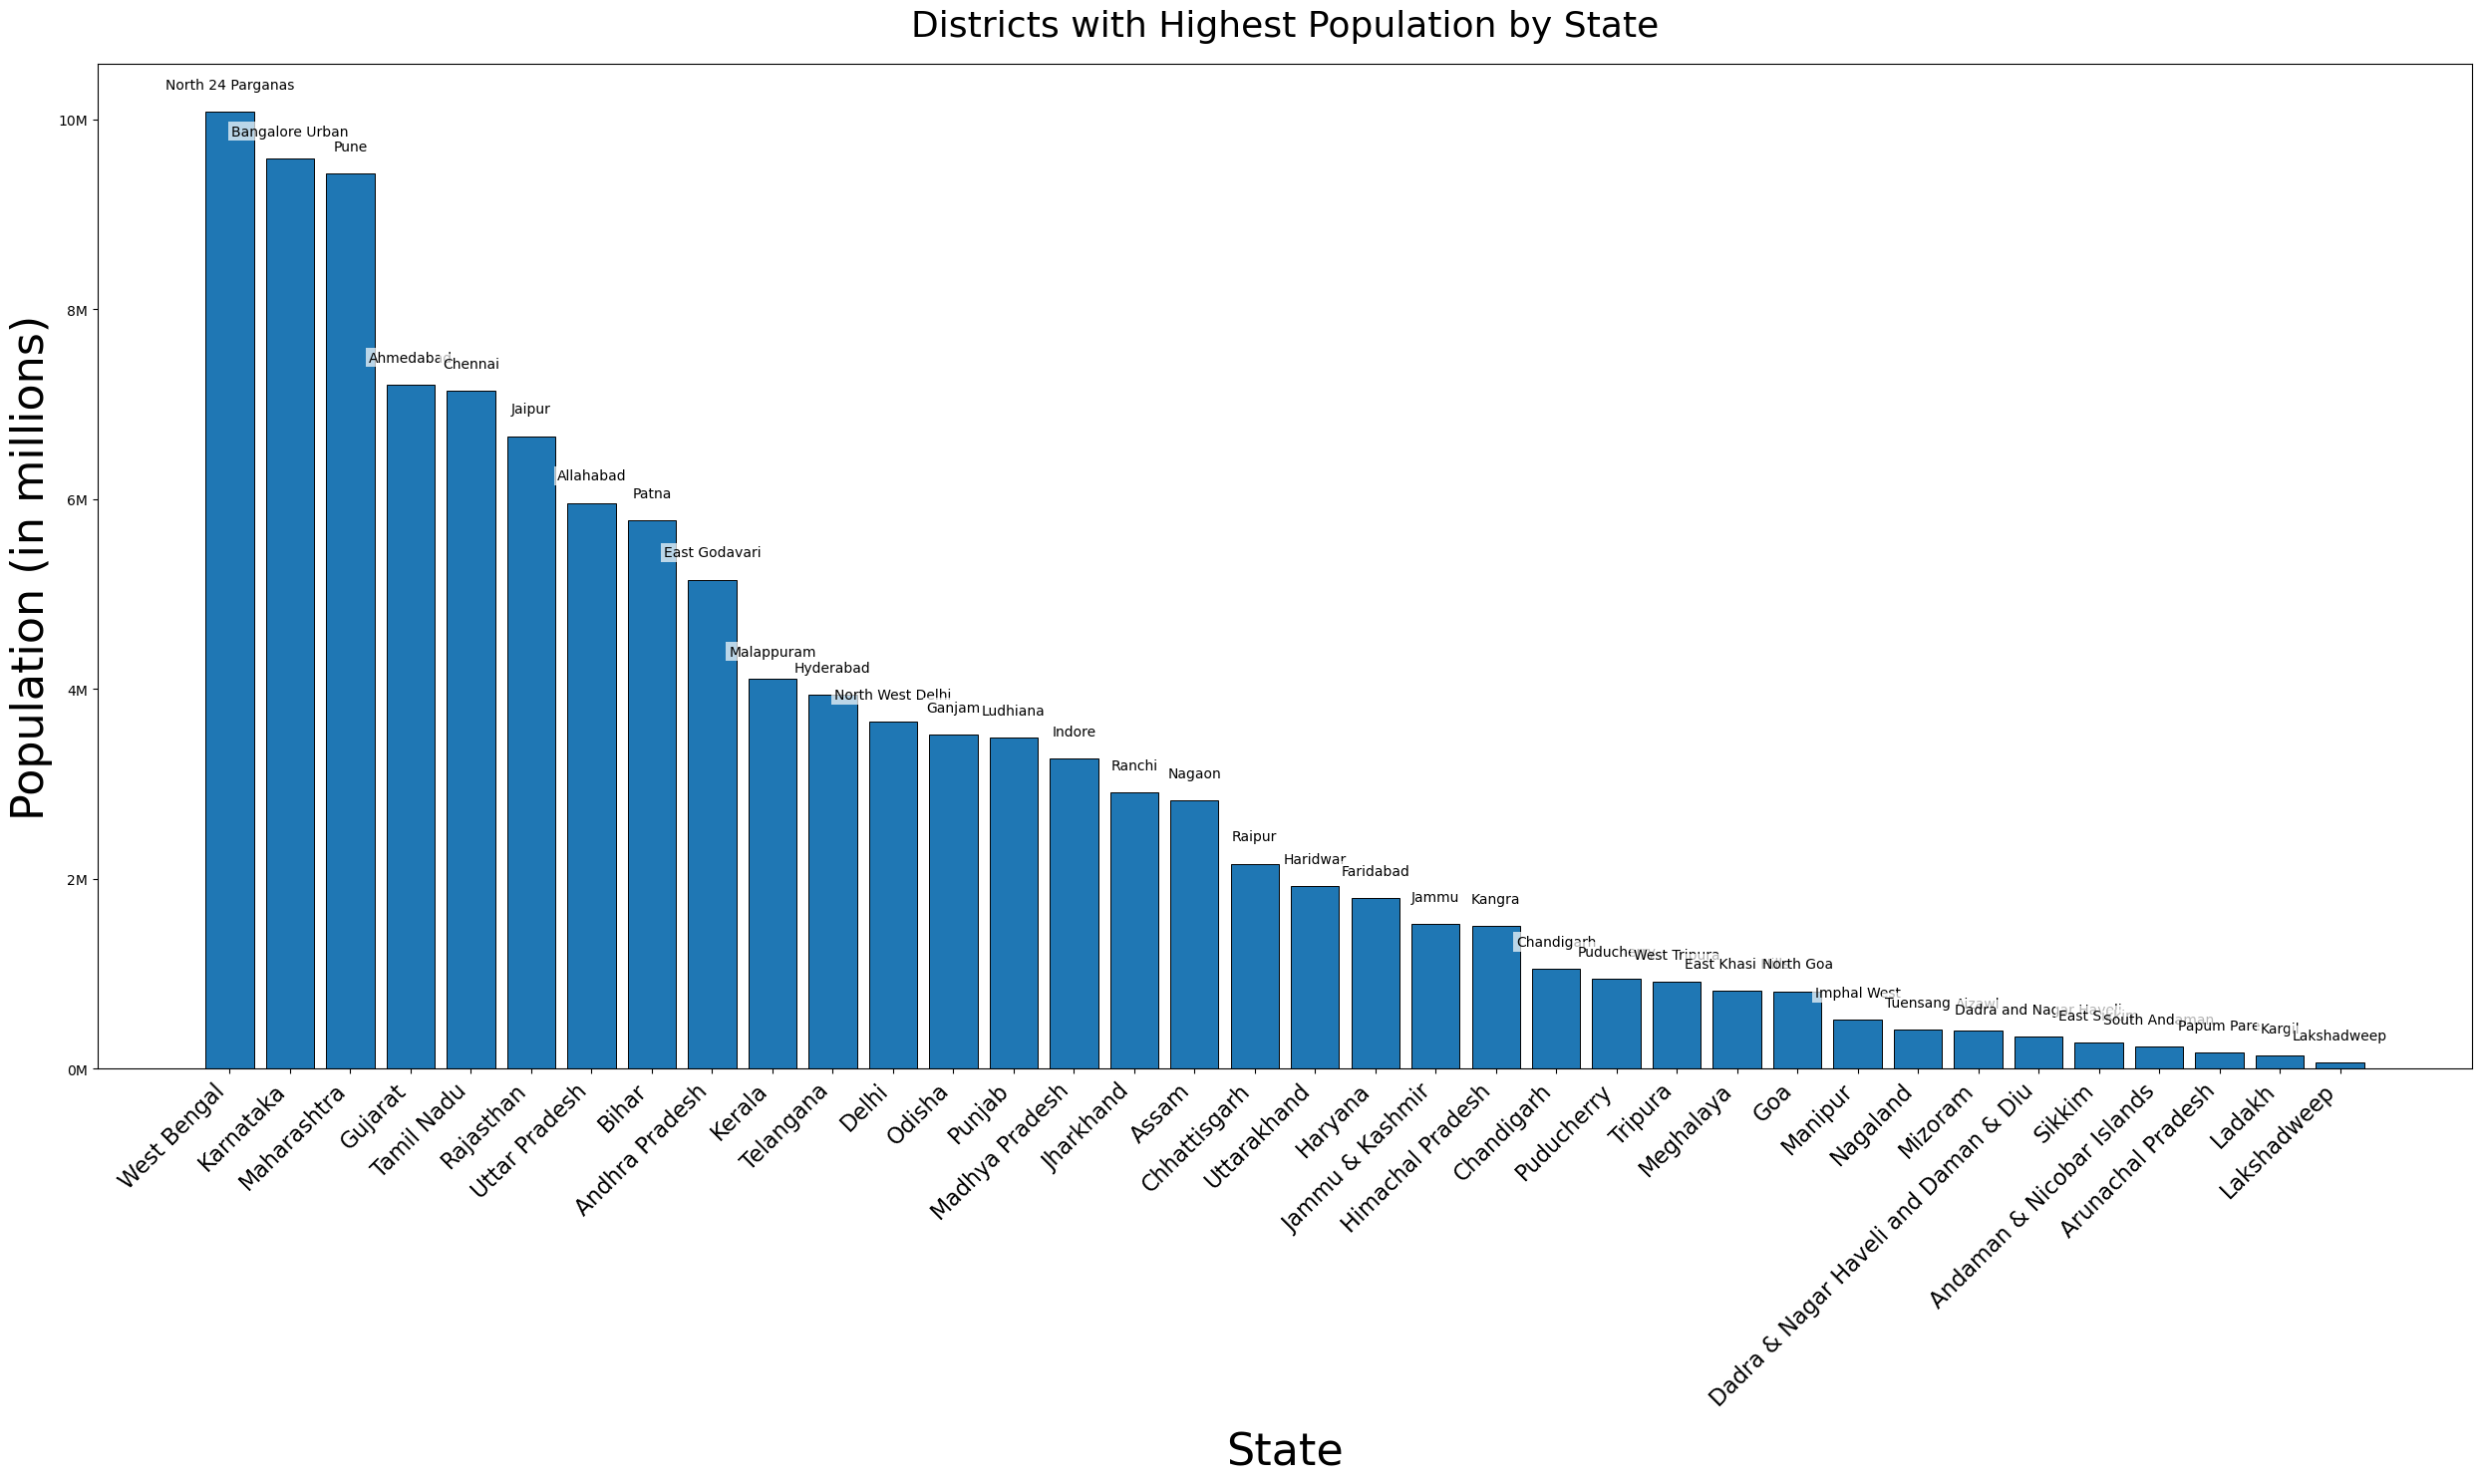

In [171]:
# Identify the district with highest population for each state
highest_pop_district = District_Demographics.loc[District_Demographics.groupby('State')['Population'].idxmax()]
highest_pop_district = highest_pop_district.sort_values('Population', ascending=False).reset_index(drop=True)
# Create the column chart
plt.figure(figsize=(25, 15))
bars = plt.bar(highest_pop_district['State'], 
               highest_pop_district['Population'], 
               color='#1f77b4',
               edgecolor='black',
               linewidth=0.7)
plt.title('Districts with Highest Population by State', fontsize=26, pad=20)
plt.xlabel('State', fontsize=32, labelpad=15)
plt.ylabel('Population (in millions)', fontsize=32)
plt.xticks(fontsize=16, rotation=45, ha='right')
plt.yticks(fontsize=10)
# Format y-axis to show values in millions
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000000)}M'))
# Add district names above the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., 
            height + (ax.get_ylim()[1]*0.02),  # Small offset above the bar
            highest_pop_district.loc[i, 'District'],
            ha='center', va='bottom', fontsize=10,
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2))
plt.tight_layout()
plt.show()

## Calculate the ATV for each Sate 

In [174]:
State_Txn_Users.columns

Index(['State', 'Year', 'Quarter', 'Transactions', 'Amount (INR)', 'ATV (INR)',
       'Registered Users', 'App Opens'],
      dtype='object')

In [184]:
State_Txn_Users.dtypes

State                object
Year                  int64
Quarter               int64
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Users      int64
App Opens             int64
dtype: object

In [192]:
## Compute Average Transaction Value for each State
average_transaction_value = State_Txn_Users.groupby('State')['ATV (INR)'].sum().reset_index()
## Rename the columns for clarity
average_transaction_value.columns = ['State', 'Average_Transaction_Value']
## Display the result in tabular form
print("Average Transaction Value for Each State:")
print(average_transaction_value)

Average Transaction Value for Each State:
                                   State  Average_Transaction_Value
0              Andaman & Nicobar Islands               44229.729913
1                         Andhra Pradesh               24473.280668
2                      Arunachal Pradesh               36936.535789
3                                  Assam               28118.939181
4                                  Bihar               28326.437694
5                             Chandigarh               29593.159044
6                           Chhattisgarh               23111.460632
7   Dadra & Nagar Haveli and Daman & Diu               20823.538391
8                                  Delhi               22257.750300
9                                    Goa               26533.619691
10                               Gujarat               23745.417081
11                               Haryana               25645.764553
12                      Himachal Pradesh               25554.741806
13    

In [194]:
## Identify the top 5 states with the highest ATV
top_5_states_highest_atv = average_transaction_value.nlargest(5, 'Average_Transaction_Value')
## Identify the top 5 states with the lowest ATV
top_5_states_lowest_atv = average_transaction_value.nsmallest(5, 'Average_Transaction_Value')
## Display the results
print("Top 5 States with Highest Average Transaction Value:")
print(top_5_states_highest_atv)
print("\nTop 5 States with Lowest Average Transaction Value:")
print(top_5_states_lowest_atv)

Top 5 States with Highest Average Transaction Value:
                        State  Average_Transaction_Value
17                     Ladakh               47715.121781
0   Andaman & Nicobar Islands               44229.729913
23                    Mizoram               40985.249221
18                Lakshadweep               38865.661810
2           Arunachal Pradesh               36936.535789

Top 5 States with Lowest Average Transaction Value:
                                   State  Average_Transaction_Value
35                           West Bengal               19230.408260
25                                Odisha               19993.923141
7   Dadra & Nagar Haveli and Daman & Diu               20823.538391
20                           Maharashtra               21229.065480
15                             Karnataka               21243.491492


## Analyze App Usage 

In [197]:
District_Txn_Users.columns

Index(['State', 'Year', 'Quarter', 'District', 'Code', 'Transactions',
       'Amount (INR)', 'ATV (INR)', 'Registered Users', 'App Opens'],
      dtype='object')

In [203]:
# Grouping by State, Year, and Quarter and summing the App Opens
Apps_Opened = District_Txn_Users.groupby(['State', 'Year', 'Quarter'])['App Opens'].sum().reset_index()
# Display the result in tabular form
print(Apps_Opened)                                   

                         State  Year  Quarter  App Opens
0    Andaman & Nicobar Islands  2018        1          0
1    Andaman & Nicobar Islands  2018        2          0
2    Andaman & Nicobar Islands  2018        3          0
3    Andaman & Nicobar Islands  2018        4          0
4    Andaman & Nicobar Islands  2019        1          0
..                         ...   ...      ...        ...
499                West Bengal  2020        2  198589332
500                West Bengal  2020        3  246554831
501                West Bengal  2020        4  291721919
502                West Bengal  2021        1  316832674
503                West Bengal  2021        2  275341466

[504 rows x 4 columns]


/var/folders/s2/tv1sj9f91gxd34cnyhkmmgm00000gn/T/ipykernel_80785/2076246871.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Time Period'] = state_data['Year'].astype(str) + ' Q' + state_data['Quarter'].astype(str)


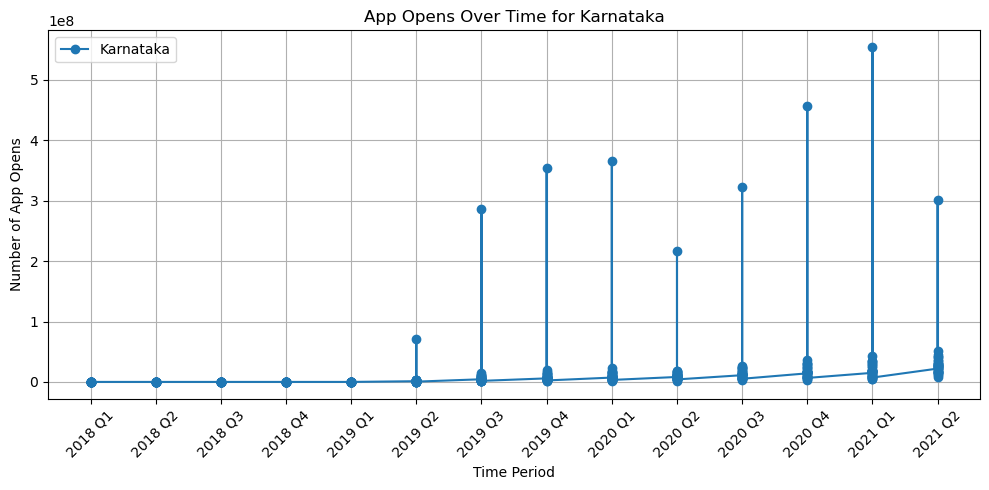

In [209]:
## Function to plot app opens for a selected state
def plot_app_opens(state):
    ## Filter data for the selected state
    state_data = District_Txn_Users[District_Txn_Users['State'] == state]
    
    ## Create a new column for the time period
    state_data['Time Period'] = state_data['Year'].astype(str) + ' Q' + state_data['Quarter'].astype(str)
    
    ## Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(state_data['Time Period'], state_data['App Opens'], marker='o', label=state)
    
    ## Adding titles and labels
    plt.title(f'App Opens Over Time for {state}')
    plt.xlabel('Time Period')
    plt.ylabel('Number of App Opens')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    ## Show the plot
    plt.show()
## Call the function to plot for Karnataka
plot_app_opens('Karnataka')

## Distribution of transaction type 

In [212]:
State_Txn_Split.columns

Index(['State', 'Year', 'Quarter', 'Transaction Type', 'Transactions',
       'Amount (INR)', 'ATV (INR)'],
      dtype='object')

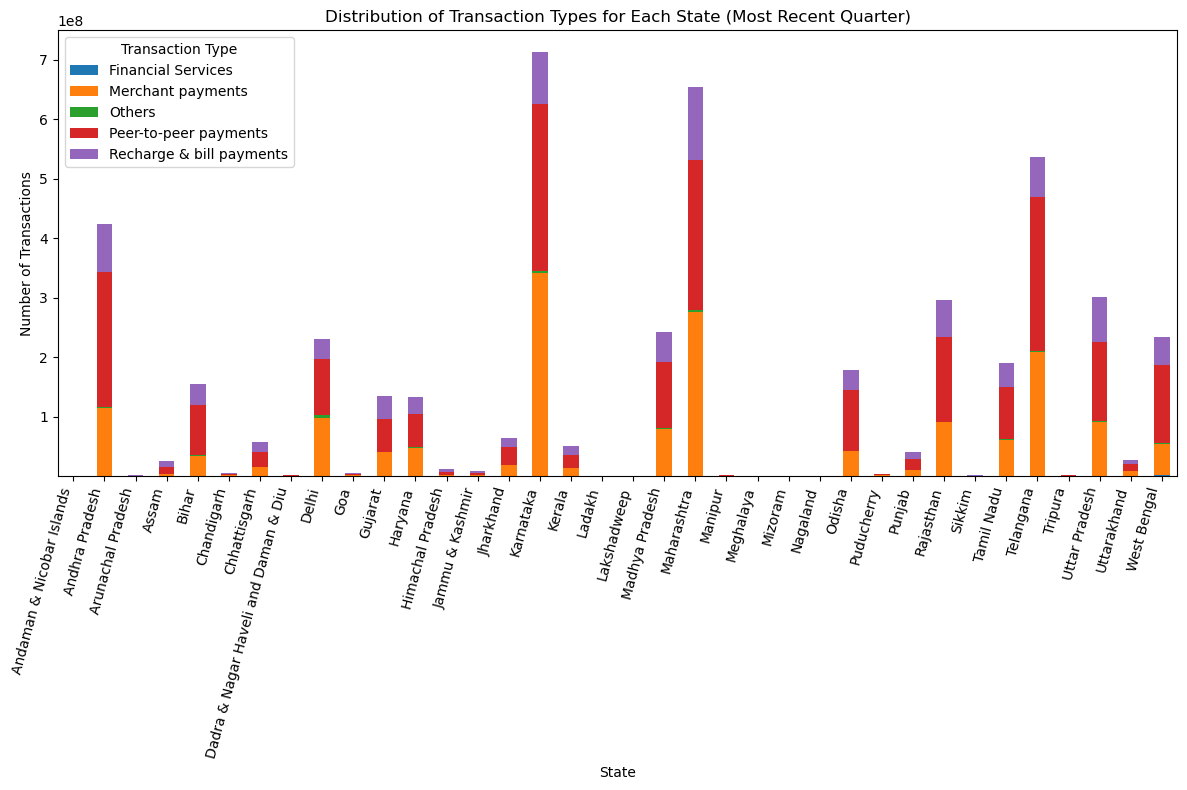

In [226]:
## Filter for the most recent quarter
most_recent_quarter = State_Txn_Split['Quarter'].max()
recent_data = State_Txn_Split[State_Txn_Split['Quarter'] == most_recent_quarter]
## Group by State and Transaction Type
grouped_data = recent_data.groupby(['State', 'Transaction Type'])['Transactions'].sum().unstack()
## Plotting
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))
## Adding titles and labels
plt.title('Distribution of Transaction Types for Each State (Most Recent Quarter)')
plt.xlabel('State')
plt.ylabel('Number of Transactions')
plt.xticks(rotation = 75, ha = 'right')
plt.yticks(fontsize = 10)
plt.legend(title = 'Transaction Type')
plt.tight_layout()
## Show the plot
plt.show()

## Find a unique mapping between district name and district code 

In [230]:
District_Txn_Users.columns

Index(['State', 'Year', 'Quarter', 'District', 'Code', 'Transactions',
       'Amount (INR)', 'ATV (INR)', 'Registered Users', 'App Opens'],
      dtype='object')

In [232]:
District_Demographics.columns

Index(['State', 'District', 'Headquarters', 'Population', 'Area (sq km)',
       'Density', 'Code', 'Alternate Name'],
      dtype='object')

In [236]:
## Create DataFrames
district_txn_users_df = pd.DataFrame(District_Txn_Users)
district_demographics_df = pd.DataFrame(District_Demographics)
## Identify unique mapping between District names and District codes
unique_mapping = district_demographics_df[['District', 'Code']].drop_duplicates()
## Display the unique mapping
print(unique_mapping)

          District  Code
0        Anantapur  AP01
1         Chittoor  AP02
2    East Godavari  AP03
3           Guntur  AP04
4              YSR  AP13
..             ...   ...
737     West Delhi  DL11
738       Karaikal  PY01
739           Mahé  PY02
740     Puducherry  PY03
741          Yanam  PY04

[742 rows x 2 columns]


In [240]:
## Create DataFrame
District_Data = pd.DataFrame(unique_mapping)
# Get unique district-code mappings
unique_districts = District_Data[['District', 'Code']].drop_duplicates()
# Save to CSV
unique_districts.to_csv('district_code_mapping.csv', index=False)
print("CSV file created successfully!")

CSV file created successfully!


## Data Quality Checks 

## Ensure Data Consisitency across state and disctrict levels 

In [246]:
State_Txn_Users.columns

Index(['State', 'Year', 'Quarter', 'Transactions', 'Amount (INR)', 'ATV (INR)',
       'Registered Users', 'App Opens'],
      dtype='object')

In [248]:
State_Txn_Split.columns

Index(['State', 'Year', 'Quarter', 'Transaction Type', 'Transactions',
       'Amount (INR)', 'ATV (INR)'],
      dtype='object')

In [250]:
District_Txn_Users.columns

Index(['State', 'Year', 'Quarter', 'District', 'Code', 'Transactions',
       'Amount (INR)', 'ATV (INR)', 'Registered Users', 'App Opens'],
      dtype='object')

In [252]:
District_Demographics.columns

Index(['State', 'District', 'Headquarters', 'Population', 'Area (sq km)',
       'Density', 'Code', 'Alternate Name'],
      dtype='object')

In [254]:
## Calculate total transactions, total amount, and total registered users by state
state_summary = District_Txn_Users.groupby('State').agg(
    Total_Transactions=('Transactions', 'sum'),
    Total_Amount=('Amount (INR)', 'sum'),
    Total_Registered_Users=('Registered Users', 'sum')
).reset_index()
## Display the summary
print(state_summary)

                                   State  Total_Transactions  Total_Amount  \
0              Andaman & Nicobar Islands             1223565  3.641818e+09   
1                         Andhra Pradesh          1781091169  3.860292e+12   
2                      Arunachal Pradesh             8043799  2.225183e+10   
3                                  Assam           123577981  2.814087e+11   
4                                  Bihar           713643889  1.639579e+12   
5                             Chandigarh            25516542  5.371208e+10   
6                           Chhattisgarh           241908549  4.156353e+11   
7   Dadra & Nagar Haveli and Daman & Diu            12462185  1.865878e+10   
8                                  Delhi          1011031124  1.649942e+12   
9                                    Goa            24481604  4.427187e+10   
10                               Gujarat           612992823  1.105329e+12   
11                               Haryana           567751410  1.

In [262]:
## Calculate total transactions, total amount, and total registered users by state
district_summary = District_Txn_Users.groupby(['State', 'Year', 'Quarter']).agg(
    Total_Transactions=('Transactions', 'sum'),
    Total_Amount=('Amount (INR)', 'sum'),
    Total_Registered_Users=('Registered Users', 'sum')
).reset_index()
## Check the columns of both DataFrames before merging
print("District Summary Columns:", district_summary.columns)
print("State Summary Columns:", State_Txn_Users.columns)
## Merge district summary with state-level data for comparison
comparison_df = pd.merge(district_summary, State_Txn_Users, on=['State', 'Year', 'Quarter'], suffixes=('_District', '_State'))
## Check for discrepancies
comparison_df['Transactions_Match'] = comparison_df['Total_Transactions'] == comparison_df['Transactions']
comparison_df['Amount_Match'] = comparison_df['Total_Amount'] == comparison_df['Amount (INR)']
comparison_df['Registered_Users_Match'] = comparison_df['Total_Registered_Users'] == comparison_df['Registered Users']
## Display the comparison results
print(comparison_df)

District Summary Columns: Index(['State', 'Year', 'Quarter', 'Total_Transactions', 'Total_Amount',
       'Total_Registered_Users'],
      dtype='object')
State Summary Columns: Index(['State', 'Year', 'Quarter', 'Transactions', 'Amount (INR)', 'ATV (INR)',
       'Registered Users', 'App Opens'],
      dtype='object')
                         State  Year  Quarter  Total_Transactions  \
0    Andaman & Nicobar Islands  2018        1                6658   
1    Andaman & Nicobar Islands  2018        2               11340   
2    Andaman & Nicobar Islands  2018        3               16265   
3    Andaman & Nicobar Islands  2018        4               23758   
4    Andaman & Nicobar Islands  2019        1               30486   
..                         ...   ...      ...                 ...   
499                West Bengal  2020        2            57676797   
500                West Bengal  2020        3            79954504   
501                West Bengal  2020        4           10

## Data Merging and Advancede Analysis

## Ratio of users to the population of state

In [268]:
State_Txn_Users.columns

Index(['State', 'Year', 'Quarter', 'Transactions', 'Amount (INR)', 'ATV (INR)',
       'Registered Users', 'App Opens'],
      dtype='object')

In [272]:
District_Demographics.columns

Index(['State', 'District', 'Headquarters', 'Population', 'Area (sq km)',
       'Density', 'Code', 'Alternate Name'],
      dtype='object')

In [274]:
## Merge the two DataFrames on 'State'
merged_df = pd.merge(State_Txn_Users, District_Demographics, on='State')
## Calculate the total population for each state
total_population = merged_df.groupby('State')['Population'].sum().reset_index()
## Calculate the total registered users for each state
total_registered_users = merged_df.groupby('State')['Registered Users'].sum().reset_index()
## Merge the totals to calculate the ratio
ratio_df = pd.merge(total_population, total_registered_users, on='State')
## Calculate the ratio of registered users to population
ratio_df['Registered_Users_to_Population_Ratio'] = ratio_df['Registered Users'] / ratio_df['Population']
## Display the result in tabular form
print(ratio_df[['State', 'Registered_Users_to_Population_Ratio']])

                                   State  Registered_Users_to_Population_Ratio
0              Andaman & Nicobar Islands                              0.229947
1                         Andhra Pradesh                              2.971351
2                      Arunachal Pradesh                              2.070538
3                                  Assam                              1.892938
4                                  Bihar                              3.014082
5                             Chandigarh                              0.257268
6                           Chhattisgarh                              2.895349
7   Dadra & Nagar Haveli and Daman & Diu                              0.986121
8                                  Delhi                              4.463753
9                                    Goa                              0.466022
10                               Gujarat                              4.518342
11                               Haryana            

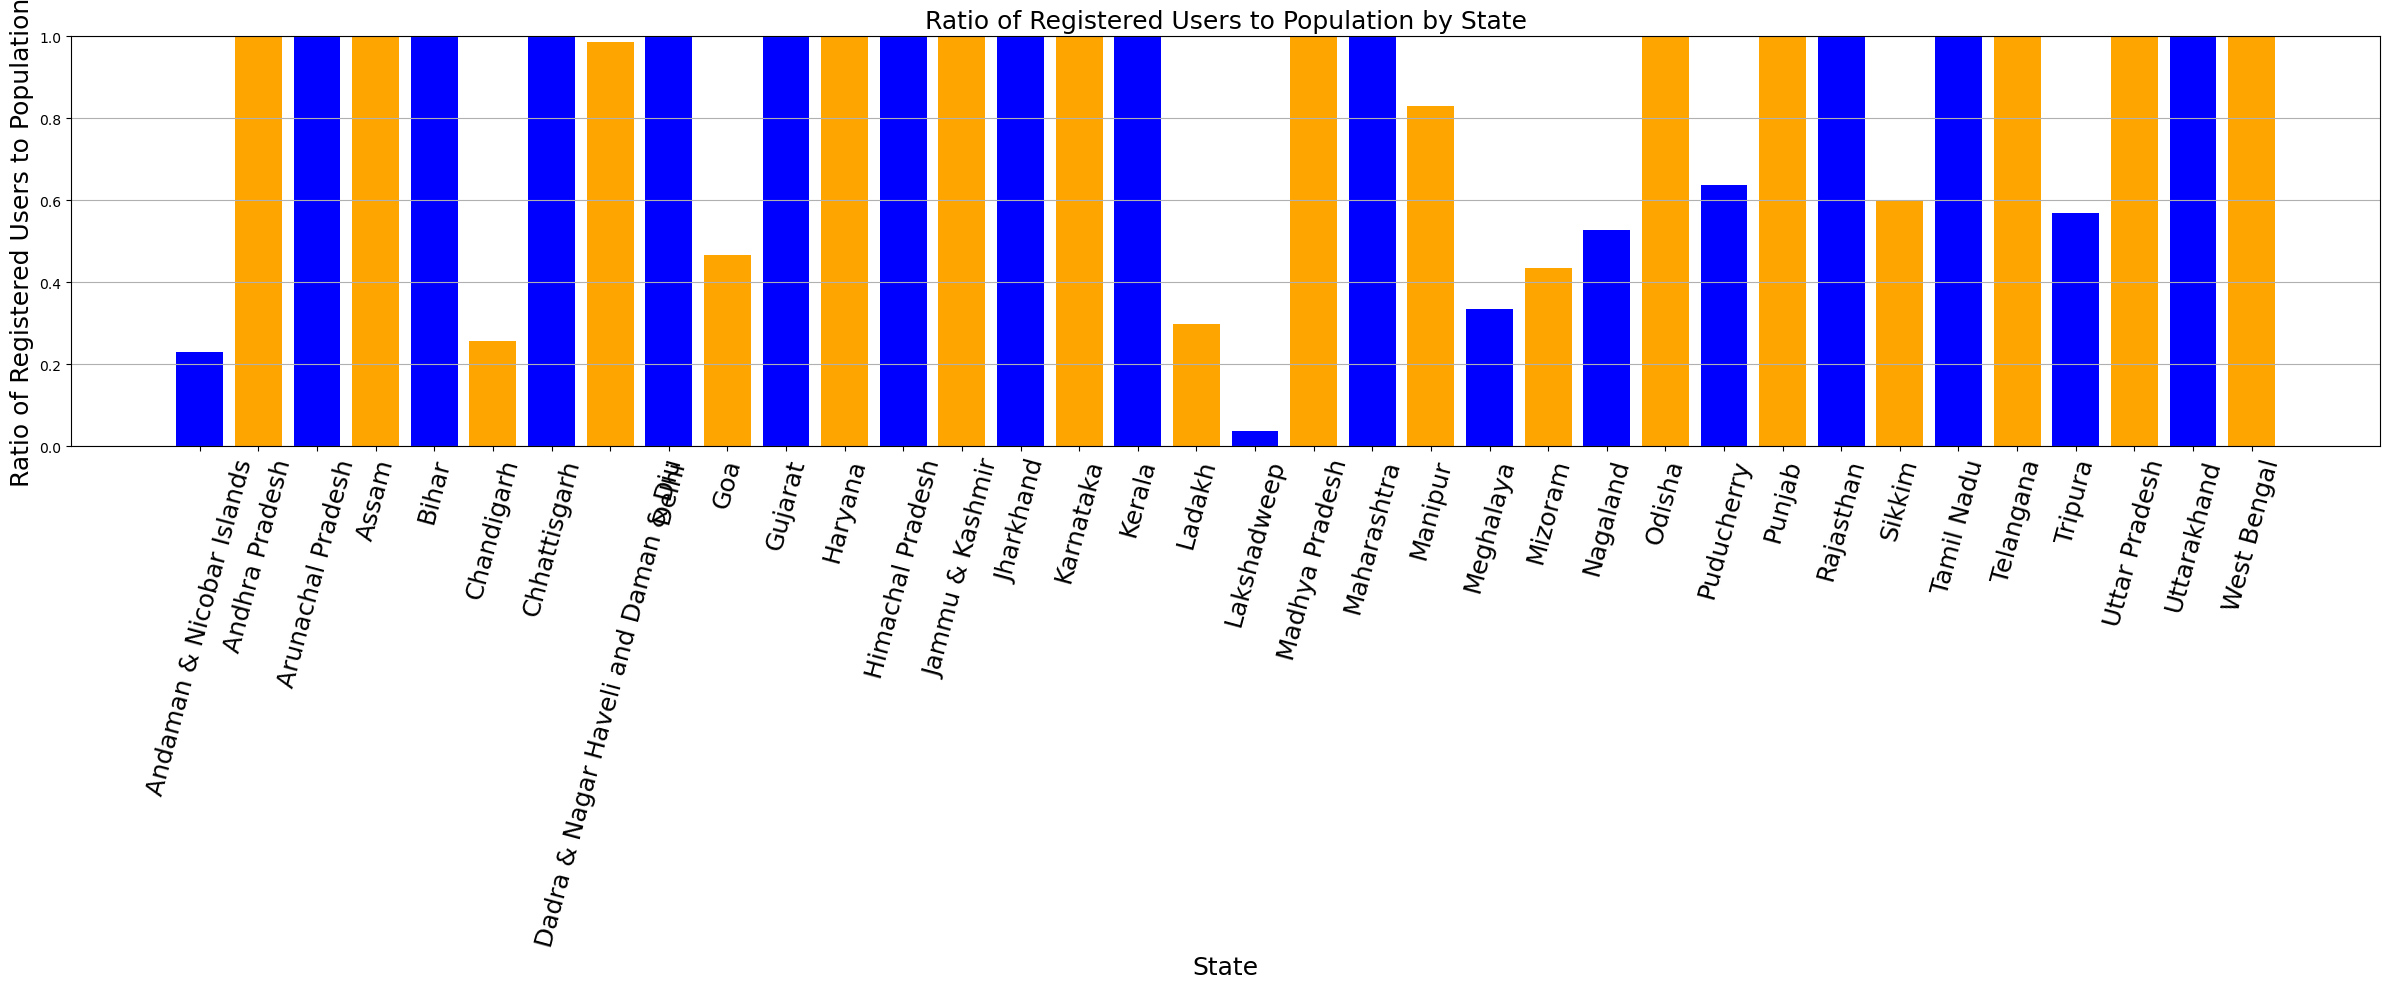

In [296]:
## Plotting the column chart
plt.figure(figsize=(24, 10))
plt.bar(ratio_df['State'], ratio_df['Registered_Users_to_Population_Ratio'], color = ['blue', 'orange'])
plt.title('Ratio of Registered Users to Population by State', fontsize = 18)
plt.xlabel('State', fontsize = 18)
plt.ylabel('Ratio of Registered Users to Population', fontsize = 18)
plt.xticks(rotation = 75, fontsize = 18)
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization
plt.grid(axis = 'y')
## Show the plot
plt.tight_layout()
plt.show()

## Correlation population density with transaction volume

In [299]:
District_Txn_Users.columns

Index(['State', 'Year', 'Quarter', 'District', 'Code', 'Transactions',
       'Amount (INR)', 'ATV (INR)', 'Registered Users', 'App Opens'],
      dtype='object')

In [303]:
## Merge the two DataFrames on 'State' and 'District'
merged_df = pd.merge(District_Txn_Users, District_Demographics, on=['State', 'District'])
## Display the result
print(merged_df)

                          State  Year  Quarter        District Code_x  \
0     Andaman & Nicobar Islands  2018        1   South Andaman   AN03   
1     Andaman & Nicobar Islands  2018        2   South Andaman   AN03   
2     Andaman & Nicobar Islands  2018        3   South Andaman   AN03   
3     Andaman & Nicobar Islands  2018        4   South Andaman   AN03   
4     Andaman & Nicobar Islands  2019        1   South Andaman   AN03   
...                         ...   ...      ...             ...    ...   
8787                West Bengal  2020        2  Uttar Dinajpur   WB23   
8788                West Bengal  2020        3  Uttar Dinajpur   WB23   
8789                West Bengal  2020        4  Uttar Dinajpur   WB23   
8790                West Bengal  2021        1  Uttar Dinajpur   WB23   
8791                West Bengal  2021        2  Uttar Dinajpur   WB23   

      Transactions  Amount (INR)    ATV (INR)  Registered Users  App Opens  \
0             5688  1.256025e+07  2208.201361

In [307]:
## Calculate the correlation between population density and transaction volume
## Here, we will use 'Transactions' as the transaction volume
correlation = merged_df['Density'].corr(merged_df['Transactions'])
## Display the result 
print(f'Correlation between Population Density and Transaction Volume: {correlation:.4f}')

Correlation between Population Density and Transaction Volume: 0.3077


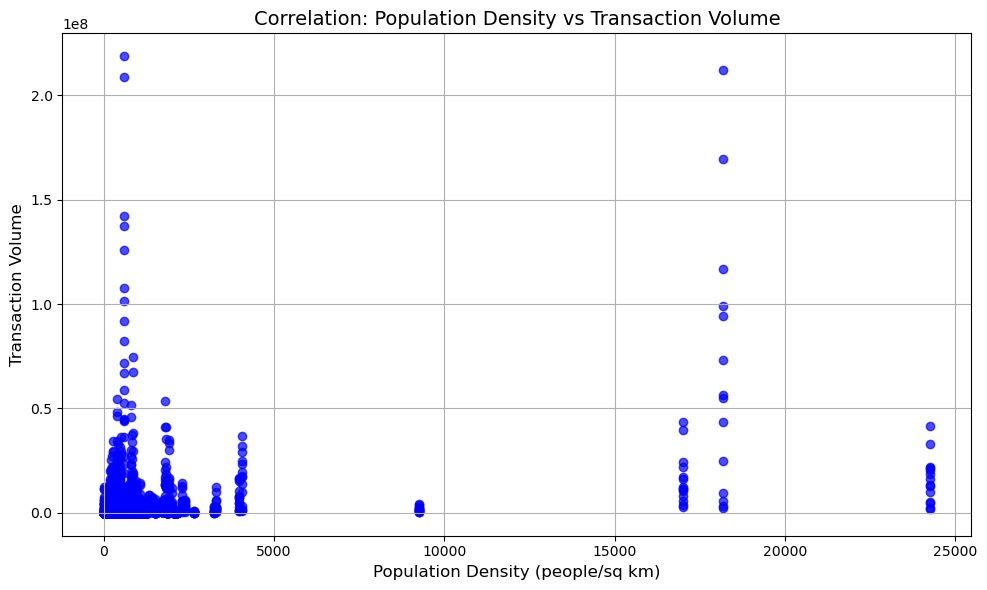

In [309]:
## Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Density'], merged_df['Transactions'], color='blue', alpha=0.7)
## Add labels and title
plt.title('Correlation: Population Density vs Transaction Volume', fontsize=14)
plt.xlabel('Population Density (people/sq km)', fontsize=12)
plt.ylabel('Transaction Volume', fontsize=12)
## Add grid and show plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Average Transaction Amount per user

In [314]:
State_Txn_Users.columns

Index(['State', 'Year', 'Quarter', 'Transactions', 'Amount (INR)', 'ATV (INR)',
       'Registered Users', 'App Opens'],
      dtype='object')

In [318]:
State_Txn_Split.columns

Index(['State', 'Year', 'Quarter', 'Transaction Type', 'Transactions',
       'Amount (INR)', 'ATV (INR)'],
      dtype='object')

In [330]:
## Merge the two DataFrames on 'State', 'Year', and 'Quarter'
merged_df = pd.merge(State_Txn_Users, State_Txn_Split, on = ['State', 'Year', 'Quarter'], suffixes = ('_users', '_split'))
## Calculate total amount and total registered users for each state
total_amount = merged_df.groupby('State')['Amount (INR)_users'].sum().reset_index()
total_users = merged_df.groupby('State')['Registered Users'].sum().reset_index()
## Merge total amount and total users
Average_Txn_Amount = pd.merge(total_amount, total_users, on='State')
## Calculate average transaction amount per user
Average_Txn_Amount['Average Transaction Amount per User'] = Average_Txn_Amount['Amount (INR)_users'] / result_df['Registered Users']
# Display the result in tabular form
print(Average_Txn_Amount[['State', 'Average Transaction Amount per User']])

                                   State  Average Transaction Amount per User
0              Andaman & Nicobar Islands                          8917.369075
1                         Andhra Pradesh                         20175.233763
2                      Arunachal Pradesh                         11949.126662
3                                  Assam                         10476.576498
4                                  Bihar                         14221.991933
5                             Chandigarh                         14129.308175
6                           Chhattisgarh                         11098.884128
7   Dadra & Nagar Haveli and Daman & Diu                          6907.815954
8                                  Delhi                         17299.587909
9                                    Goa                          9309.966756
10                               Gujarat                          8746.070597
11                               Haryana                        

In [336]:
# Identify top 5 states with highest and lowest Average Transaction Amount per User
top_5_states = Average_Txn_Amount.nlargest(5, 'Average Transaction Amount per User')
bottom_5_states = Average_Txn_Amount.nsmallest(5, 'Average Transaction Amount per User')
# Display the results
print("Top 5 States with Highest Average Transaction Amount per User:")
print(top_5_states[['State', 'Average Transaction Amount per User']])
print("\nTop 5 States with Lowest Average Transaction Amount per User:")
print(bottom_5_states[['State', 'Average Transaction Amount per User']])

Top 5 States with Highest Average Transaction Amount per User:
             State  Average Transaction Amount per User
31       Telangana                         30653.509622
15       Karnataka                         21474.282206
1   Andhra Pradesh                         20175.233763
28       Rajasthan                         17530.768707
8            Delhi                         17299.587909

Top 5 States with Lowest Average Transaction Amount per User:
                                   State  Average Transaction Amount per User
18                           Lakshadweep                          5650.336512
32                               Tripura                          5727.184275
7   Dadra & Nagar Haveli and Daman & Diu                          6907.815954
16                                Kerala                          7274.846690
12                      Himachal Pradesh                          7317.601442


## Device brand usage rate 

In [339]:
State_Device_Data.columns

Index(['State', 'Year', 'Quarter', 'Brand', 'Registered Users', 'Percentage'], dtype='object')

In [341]:
State_Txn_Users.columns

Index(['State', 'Year', 'Quarter', 'Transactions', 'Amount (INR)', 'ATV (INR)',
       'Registered Users', 'App Opens'],
      dtype='object')

In [343]:
## Merge the two DataFrames on 'State', 'Year', and 'Quarter'
merged_df = pd.merge(State_Device_Data, State_Txn_Users, on=['State', 'Year', 'Quarter'], suffixes=('_device', '_txn'))
## Display the merged DataFrame
print(merged_df) 

                          State  Year  Quarter    Brand  \
0     Andaman & Nicobar Islands  2018        1   Xiaomi   
1     Andaman & Nicobar Islands  2018        1  Samsung   
2     Andaman & Nicobar Islands  2018        1     Vivo   
3     Andaman & Nicobar Islands  2018        1     Oppo   
4     Andaman & Nicobar Islands  2018        1  OnePlus   
...                         ...   ...      ...      ...   
5539                West Bengal  2021        2   Lenovo   
5540                West Bengal  2021        2     Asus   
5541                West Bengal  2021        2   Huawei   
5542                West Bengal  2021        2    Apple   
5543                West Bengal  2021        2   Others   

      Registered Users_device  Percentage  Transactions  Amount (INR)  \
0                        1665    0.247033          6658  1.463176e+07   
1                        1445    0.214392          6658  1.463176e+07   
2                         982    0.145697          6658  1.463176e+07   

In [345]:
## Calculate the total registered users for each state
total_registered_users = merged_df.groupby('State')['Registered Users_txn'].sum().reset_index()
total_registered_users.rename(columns={'Registered Users_txn': 'Total Registered Users'}, inplace=True)
## Merge to get total registered users in the merged DataFrame
merged_df = pd.merge(merged_df, total_registered_users, on = 'State')
## Calculate the ratio of users using each brand device to the total number of registered users
merged_df['User  Ratio'] = (merged_df['Registered Users_device'] / merged_df['Total Registered Users'])
## Select relevant columns for display
ratio = merged_df[['State', 'Brand', 'Registered Users_device', 'Total Registered Users', 'User  Ratio']]
## Display the result 
print(ratio)

                          State    Brand  Registered Users_device  \
0     Andaman & Nicobar Islands   Xiaomi                     1665   
1     Andaman & Nicobar Islands  Samsung                     1445   
2     Andaman & Nicobar Islands     Vivo                      982   
3     Andaman & Nicobar Islands     Oppo                      501   
4     Andaman & Nicobar Islands  OnePlus                      332   
...                         ...      ...                      ...   
5539                West Bengal   Lenovo                   350841   
5540                West Bengal     Asus                   297579   
5541                West Bengal   Huawei                   272965   
5542                West Bengal    Apple                   201393   
5543                West Bengal   Others                  1928653   

      Total Registered Users  User  Ratio  
0                    4492356     0.000371  
1                    4492356     0.000322  
2                    4492356     0.0002

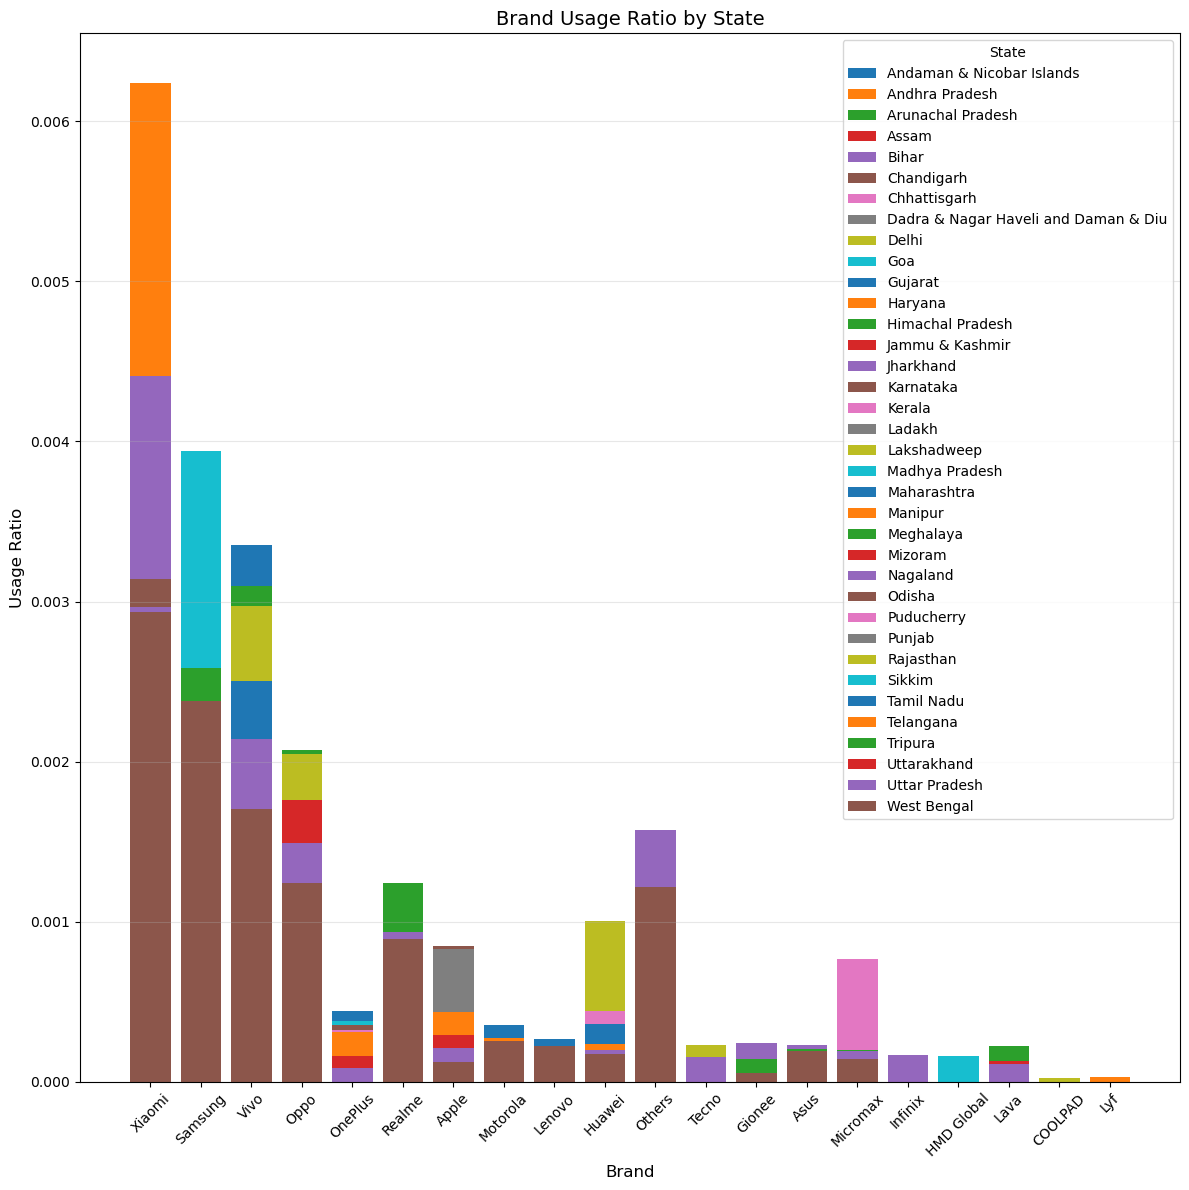

In [361]:
## Create a bar chart
plt.figure(figsize=(12,12))
for state in merged_df['State'].unique():
    state_data = merged_df[merged_df['State'] == state]
    plt.bar(state_data['Brand'], state_data['User  Ratio'], label=state)
## Customize the plot
plt.title('Brand Usage Ratio by State', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Usage Ratio', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='State')
plt.grid(axis='y', alpha=0.3)
## Show the plot
plt.tight_layout()
plt.show()

## Data Visualization

## Plot the total transactions and amount over the period for a selected state 

In [378]:
State_Txn_Users.columns

Index(['State', 'Year', 'Quarter', 'Transactions', 'Amount (INR)', 'ATV (INR)',
       'Registered Users', 'App Opens'],
      dtype='object')

/var/folders/s2/tv1sj9f91gxd34cnyhkmmgm00000gn/T/ipykernel_80785/444454473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Year-Quarter'] = state_data['Year'].astype(str) + ' Q' + state_data['Quarter'].astype(str)


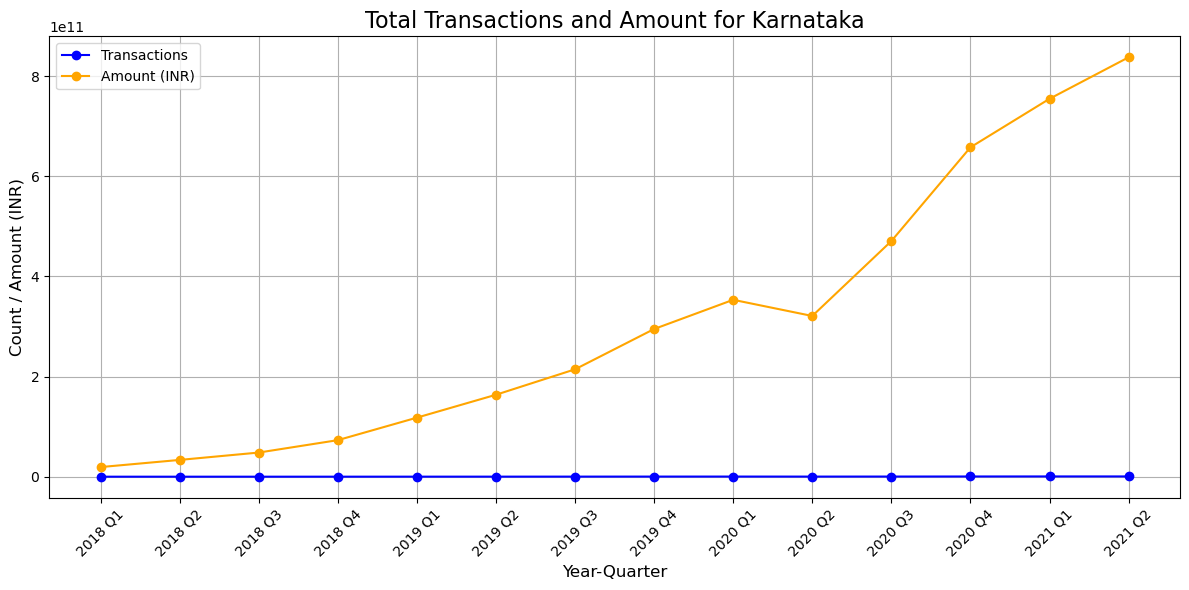

In [380]:
## Function to plot transactions and amount for a selected state
def plot_transactions_and_amount(state):
    # Filter data for the selected state
    state_data = State_Txn_Users[State_Txn_Users['State'] == state]
    
    ## Create a new column for Year-Quarter
    state_data['Year-Quarter'] = state_data['Year'].astype(str) + ' Q' + state_data['Quarter'].astype(str)
    
    ## Plotting
    plt.figure(figsize=(12, 6))
    
    ## Plot Transactions
    plt.plot(state_data['Year-Quarter'], state_data['Transactions'], marker = 'o', label = 'Transactions', color='blue')
    
    ## Plot Amount
    plt.plot(state_data['Year-Quarter'], state_data['Amount (INR)'], marker = 'o', label = 'Amount (INR)', color='orange')
    
    ## Adding titles and labels
    plt.title(f'Total Transactions and Amount for {state}', fontsize = 16)
    plt.xlabel('Year-Quarter', fontsize = 12)
    plt.ylabel('Count / Amount (INR)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    
    ## Show plot
    plt.tight_layout()
    plt.show()
## Call the function for a specific state
plot_transactions_and_amount('Karnataka')

## Create a Pie Chart the distribution of different types of transaction for a selected state and quarter

In [409]:
State_Txn_Split.columns

Index(['State', 'Year', 'Quarter', 'Transaction Type', 'Transactions',
       'Amount (INR)', 'ATV (INR)'],
      dtype='object')

In [414]:
State_Txn_Users.columns

Index(['State', 'Year', 'Quarter', 'Transactions', 'Amount (INR)', 'ATV (INR)',
       'Registered Users', 'App Opens'],
      dtype='object')

/var/folders/s2/tv1sj9f91gxd34cnyhkmmgm00000gn/T/ipykernel_80785/2465932362.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



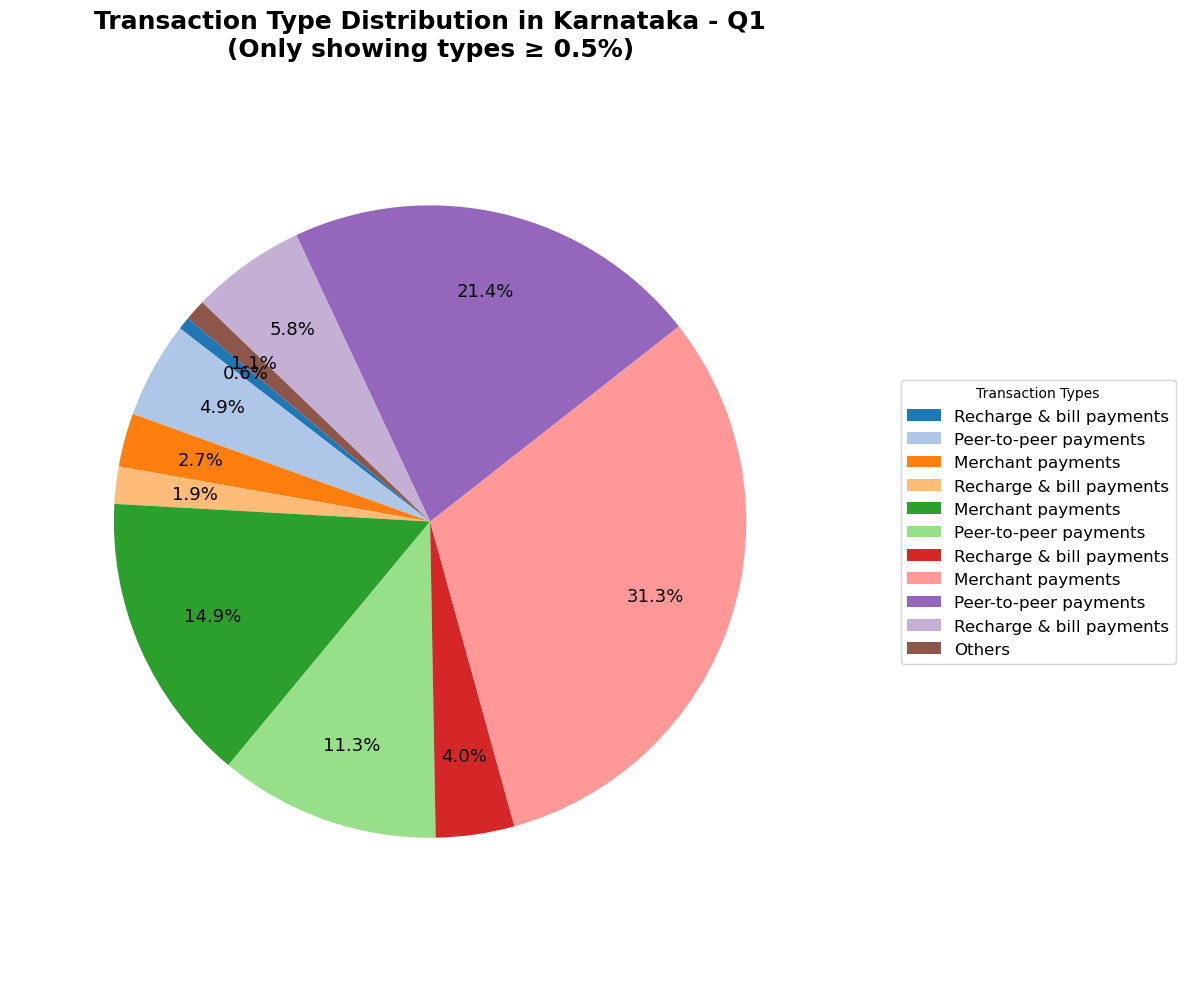

In [463]:
import matplotlib.pyplot as plt

## Set state and quarter
state = 'Karnataka'
quarter = 1
threshold_pct = 0.5  # Minimum percentage to show

## Filter data
data = State_Txn_Split[(State_Txn_Split['State'] == state) & 
                       (State_Txn_Split['Quarter'] == quarter)]

## Check if data exists
if not data.empty:
    ## Calculate total
    total_txns = data['Transactions'].sum()

    ## Calculate % and filter
    data['Percentage'] = (data['Transactions'] / total_txns) * 100
    main_data = data[data['Percentage'] >= threshold_pct]
    other_data = data[data['Percentage'] < threshold_pct]

    ## Combine "Others" if needed
    if not other_data.empty:
        others_sum = other_data['Transactions'].sum()
        others_row = pd.DataFrame({
            'Transaction Type': ['Others'],
            'Transactions': [others_sum]
        })
        main_data = pd.concat([main_data[['Transaction Type', 'Transactions']], others_row])

    ## Labels and values
    labels = main_data['Transaction Type']
    sizes = main_data['Transactions']
    colors = plt.get_cmap('tab20').colors[:len(labels)]

    ## Plot
    fig, ax = plt.subplots(figsize = (12, 10))
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels = None,  
        autopct = '%.1f%%',
        startangle = 140,
        colors = colors,
        pctdistance = 0.75,
        textprops={'fontsize': 13}
    )

    ## Legend outside
    ax.legend(wedges, labels,
              title="Transaction Types",
              loc="center left",
              bbox_to_anchor = (1.05, 0.5),
              fontsize = 12)

    ## Title
    plt.title(f'Transaction Type Distribution in {state} - Q{quarter}\n(Only showing types ≥ {threshold_pct}%)',
              fontsize = 18, fontweight = 'bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
else:
    print("No data found for the selected state and quarter.")

## Visualize the Population Density of Districts in a selected state 

In [470]:
District_Demographics.columns

Index(['State', 'District', 'Headquarters', 'Population', 'Area (sq km)',
       'Density', 'Code', 'Alternate Name'],
      dtype='object')

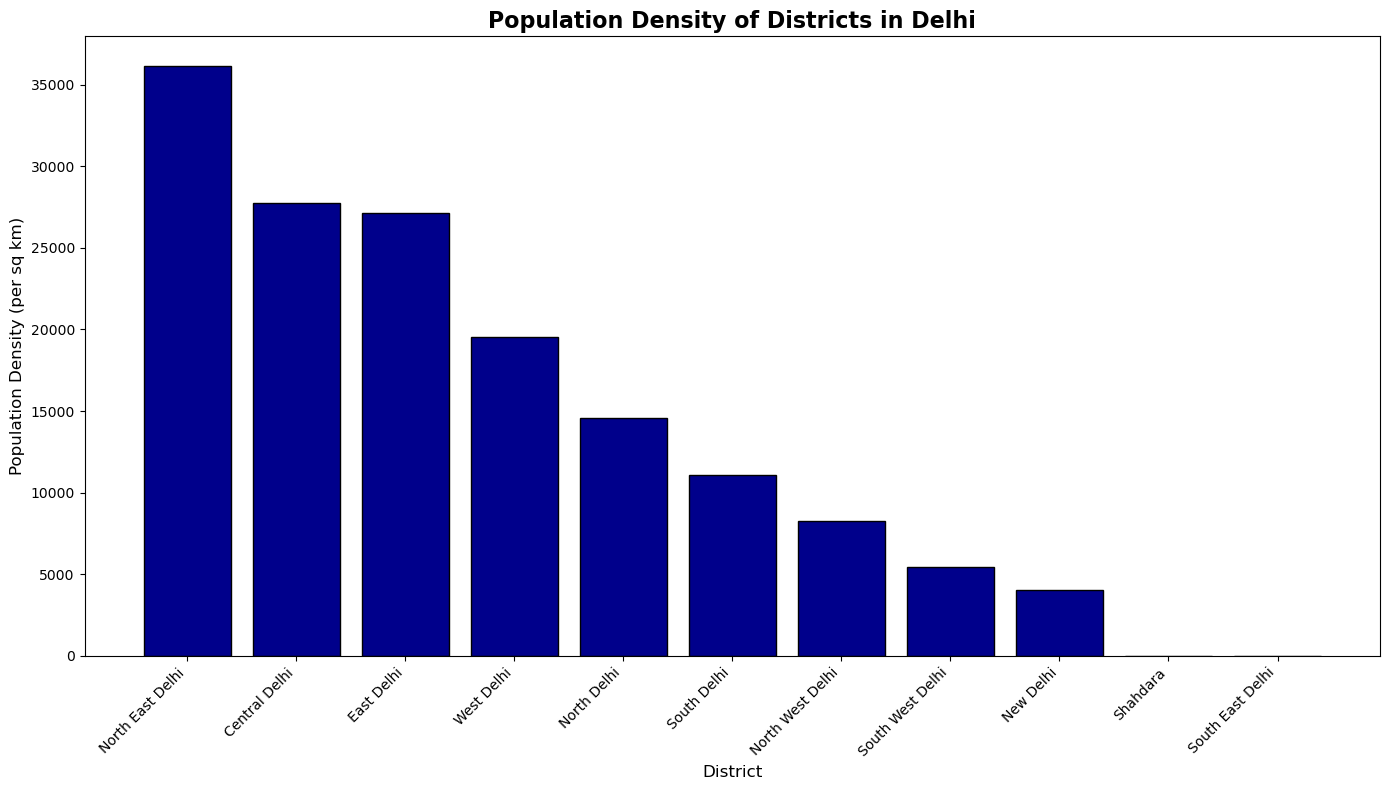

In [482]:
## Set the state you want to visualize
selected_state = 'Delhi' 

## Filter data for the selected state
state_data = District_Demographics[District_Demographics['State'] == selected_state]

## Sort districts by Density 
state_data = state_data.sort_values(by = 'Density', ascending = False)

## Plotting
plt.figure(figsize=(14, 8))
plt.bar(state_data['District'], state_data['Density'], color='darkblue', edgecolor = 'black')

## Labels and formatting
plt.title(f'Population Density of Districts in {selected_state}', fontsize = 16, fontweight = 'bold')
plt.xlabel('District', fontsize = 12)
plt.ylabel('Population Density (per sq km)', fontsize = 12)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

# Show plot
plt.show()

## Insights and Conclusions

## Identify any trends or patterns in Transaction data

In [488]:
State_Txn_Users.columns

Index(['State', 'Year', 'Quarter', 'Transactions', 'Amount (INR)', 'ATV (INR)',
       'Registered Users', 'App Opens'],
      dtype='object')

In [490]:
State_Txn_Split.columns

Index(['State', 'Year', 'Quarter', 'Transaction Type', 'Transactions',
       'Amount (INR)', 'ATV (INR)'],
      dtype='object')

In [492]:
State_Device_Data.columns

Index(['State', 'Year', 'Quarter', 'Brand', 'Registered Users', 'Percentage'], dtype='object')

In [496]:
District_Txn_Users.columns

Index(['State', 'Year', 'Quarter', 'District', 'Code', 'Transactions',
       'Amount (INR)', 'ATV (INR)', 'Registered Users', 'App Opens'],
      dtype='object')

In [498]:
District_Demographics.columns

Index(['State', 'District', 'Headquarters', 'Population', 'Area (sq km)',
       'Density', 'Code', 'Alternate Name'],
      dtype='object')

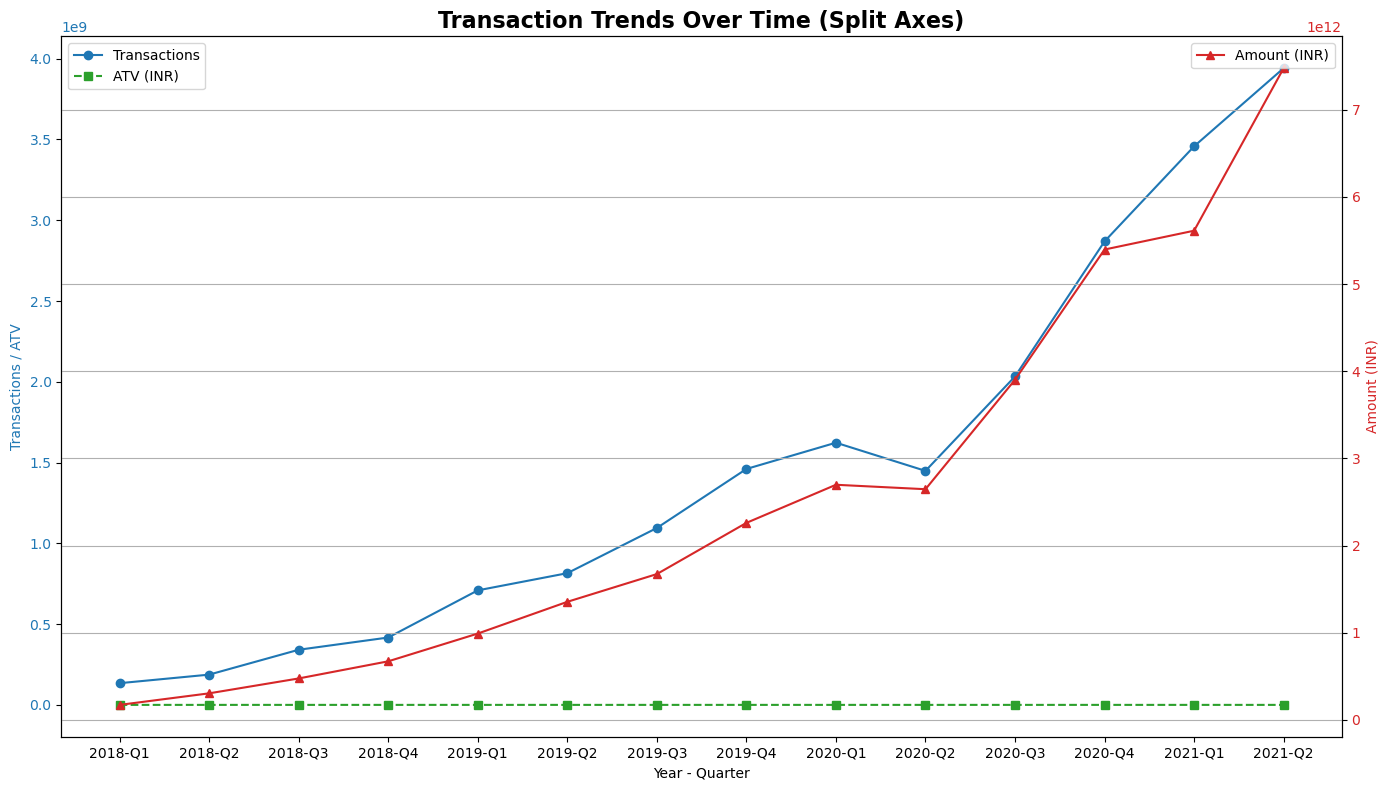

In [504]:
import matplotlib.pyplot as plt

# Prepare data same as before
data = State_Txn_Users.copy()
data['Year_Quarter'] = data['Year'].astype(str) + '-Q' + data['Quarter'].astype(str)
agg_data = data.groupby('Year_Quarter')[['Transactions', 'Amount (INR)', 'ATV (INR)']].sum().reset_index()

# Sort chronologically
agg_data['Year_Quarter'] = pd.Categorical(
    agg_data['Year_Quarter'], 
    categories=sorted(agg_data['Year_Quarter'].unique(), key=lambda x: (int(x.split('-')[0]), int(x.split('-')[1][1]))),
    ordered=True
)
agg_data = agg_data.sort_values('Year_Quarter')

# Plot with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# First axis for Transactions and ATV
color1, color2 = 'tab:blue', 'tab:green'
ax1.set_xlabel('Year - Quarter')
ax1.set_ylabel('Transactions / ATV', color=color1)
ax1.plot(agg_data['Year_Quarter'], agg_data['Transactions'], color=color1, marker='o', label='Transactions')
ax1.plot(agg_data['Year_Quarter'], agg_data['ATV (INR)'], color=color2, marker='s', linestyle='--', label='ATV (INR)')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.legend(loc='upper left')

# Second axis for Amount
ax2 = ax1.twinx()
color3 = 'tab:red'
ax2.set_ylabel('Amount (INR)', color=color3)
ax2.plot(agg_data['Year_Quarter'], agg_data['Amount (INR)'], color=color3, marker='^', label='Amount (INR)')
ax2.tick_params(axis='y', labelcolor=color3)
ax2.legend(loc='upper right')

plt.title('Transaction Trends Over Time (Split Axes)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# Save the figure (change path or format if needed)
plt.savefig('transaction_trends.png', dpi=300, bbox_inches='tight')  
## Show the result 
plt.show()


## 🔑 Key Insights

## 📊 Overall Conclusion:

## 📉 Correlate Demographic data with Transaction data

In [511]:
## STEP 1: Select a specific quarter (latest recommended)
latest_quarter = (2021, 2)  # (Year, Quarter)
txn = District_Txn_Users[(District_Txn_Users['Year'] == latest_quarter[0]) & 
                         (District_Txn_Users['Quarter'] == latest_quarter[1])]

## STEP 2: Merge with demographic data
merged = pd.merge(txn, District_Demographics, 
                  on=['State', 'District'], 
                  how='inner')

## STEP 3: Select variables to correlate
correlation_data = merged[['Population', 'Density', 'Transactions', 'Amount (INR)', 'ATV (INR)', 'Registered Users']]

## STEP 4: Compute correlation matrix
correlation_matrix = correlation_data.corr()
print(correlation_matrix)

                  Population   Density  Transactions  Amount (INR)  ATV (INR)  \
Population          1.000000  0.304296      0.467734      0.472902  -0.263309   
Density             0.304296  1.000000      0.417003      0.453149  -0.110458   
Transactions        0.467734  0.417003      1.000000      0.982615  -0.169103   
Amount (INR)        0.472902  0.453149      0.982615      1.000000  -0.139966   
ATV (INR)          -0.263309 -0.110458     -0.169103     -0.139966   1.000000   
Registered Users    0.762749  0.340907      0.828696      0.807196  -0.302864   

                  Registered Users  
Population                0.762749  
Density                   0.340907  
Transactions              0.828696  
Amount (INR)              0.807196  
ATV (INR)                -0.302864  
Registered Users          1.000000  


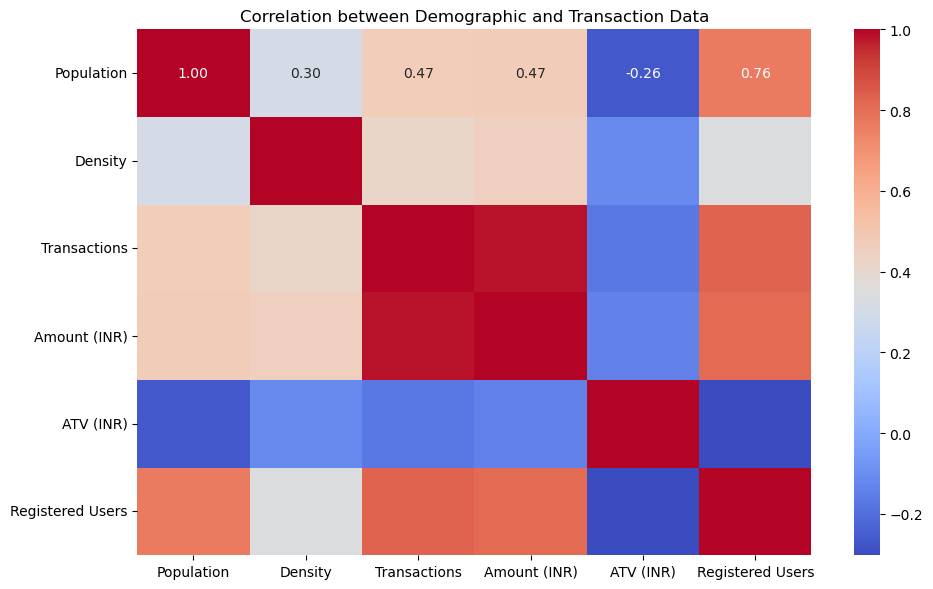

In [521]:
## We can create HeatMap for the for same to analyse better
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation between Demographic and Transaction Data')
plt.tight_layout()
## Save the figure
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
## Display the heatmap
plt.show()

## Key Insights

## 🔑 Strong Positive Correlation:

## ⚖️ Moderate Positive Correlation:

## 🔄 Weak or No Significant Correlation:

## 🔻 Negative Correlation:

## 🎯 Business Implications: